In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [52]:
data=pd.read_csv("spam7.csv", sep=";")

data

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [53]:
Y=data["yesno"]
X = data.drop('yesno', axis=1)

In [54]:
Y

0       y
1       y
2       y
3       y
4       y
       ..
4596    n
4597    n
4598    n
4599    n
4600    n
Name: yesno, Length: 4601, dtype: object

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [56]:
model=DecisionTreeClassifier()


In [57]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:

y_pred =model.predict(X_test)
proba_scores = model.predict_proba(X_test)
 # Affichons les résultats des 5 premiers individus
for i in range(5): 
    print(f"Individu {i + 1}:")
    print(f"Classe prédite : {y_pred[i]}")
    print(f"Scores associés : {proba_scores[i]}")
    print("\n")

Individu 1:
Classe prédite : n
Scores associés : [0.95652174 0.04347826]


Individu 2:
Classe prédite : n
Scores associés : [1. 0.]


Individu 3:
Classe prédite : n
Scores associés : [1. 0.]


Individu 4:
Classe prédite : y
Scores associés : [0. 1.]


Individu 5:
Classe prédite : n
Scores associés : [1. 0.]




In [59]:
model.score(X_test, y_test)

0.8414766558089034

[Text(0.7108255569448307, 0.9807692307692307, 'x[1] <= 0.056\ngini = 0.474\nsamples = 3680\nvalue = [2257, 1423]'),
 Text(0.5280113729487842, 0.9423076923076923, 'x[2] <= 0.091\ngini = 0.35\nsamples = 2779\nvalue = [2150, 629]'),
 Text(0.4019381940857438, 0.9038461538461539, 'x[4] <= 0.26\ngini = 0.178\nsamples = 1950\nvalue = [1758, 192]'),
 Text(0.3305769603266052, 0.8653846153846154, 'x[3] <= 0.035\ngini = 0.169\nsamples = 1932\nvalue = [1752, 180]'),
 Text(0.2031119626112524, 0.8269230769230769, 'x[0] <= 29.5\ngini = 0.159\nsamples = 1891\nvalue = [1726, 165]'),
 Text(0.043706293706293704, 0.7884615384615384, 'x[0] <= 15.5\ngini = 0.083\nsamples = 672\nvalue = [643, 29]'),
 Text(0.015575333757151939, 0.75, 'x[0] <= 2.5\ngini = 0.059\nsamples = 461\nvalue = [447, 14]'),
 Text(0.0050858232676414495, 0.7115384615384616, 'x[0] <= 1.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.0025429116338207248, 0.6730769230769231, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.00762

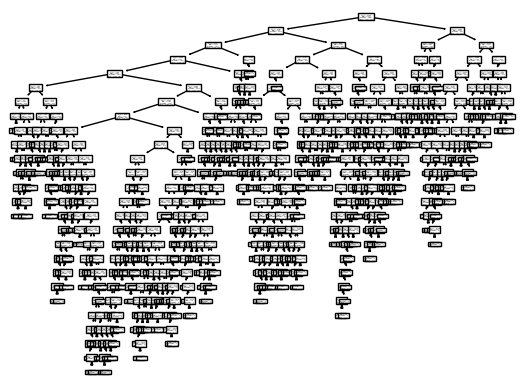

In [60]:
from sklearn import tree
tree.plot_tree(model)

In [61]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.1, 0.2]}
model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10, scoring='accuracy')
model.fit(X_train, y_train)   
best_params = model.best_params_
best_classifier = model.best_estimator_
train_accuracy = best_classifier.score(X_train, y_train)
test_accuracy = best_classifier.score(X_test, y_test)
print("Meilleurs paramètres:", best_params)
print("Classifieur optimal:", best_classifier)
print("Erreur d'entraînement:", 1 - train_accuracy)
print("Erreur de test:", 1 - test_accuracy)


Meilleurs paramètres: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Classifieur optimal: DecisionTreeClassifier(max_depth=10)
Erreur d'entraînement: 0.071195652173913
Erreur de test: 0.14440825190010853


[Text(0.6170997191011236, 0.9545454545454546, 'x[1] <= 0.056\ngini = 0.474\nsamples = 3680\nvalue = [2257, 1423]'),
 Text(0.3983656792645557, 0.8636363636363636, 'x[2] <= 0.091\ngini = 0.35\nsamples = 2779\nvalue = [2150, 629]'),
 Text(0.28217568947906024, 0.7727272727272727, 'x[4] <= 0.26\ngini = 0.178\nsamples = 1950\nvalue = [1758, 192]'),
 Text(0.22625127681307455, 0.6818181818181818, 'x[3] <= 0.035\ngini = 0.169\nsamples = 1932\nvalue = [1752, 180]'),
 Text(0.13891726251276812, 0.5909090909090909, 'x[0] <= 29.5\ngini = 0.159\nsamples = 1891\nvalue = [1726, 165]'),
 Text(0.0602655771195097, 0.5, 'x[0] <= 15.5\ngini = 0.083\nsamples = 672\nvalue = [643, 29]'),
 Text(0.021450459652706845, 0.4090909090909091, 'x[0] <= 2.5\ngini = 0.059\nsamples = 461\nvalue = [447, 14]'),
 Text(0.008171603677221655, 0.3181818181818182, 'x[0] <= 1.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.0040858018386108275, 0.22727272727272727, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.01225

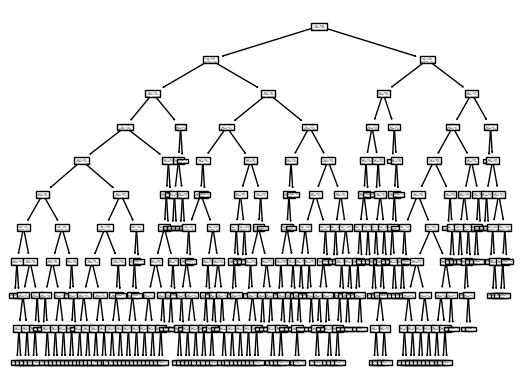

In [62]:
tree.plot_tree(best_classifier)

In [63]:
import matplotlib.pyplot as plt
feature_importances = best_classifier.feature_importances_

In [64]:
features_list=list(X.columns)
# Triez les fonctionnalités par importance décroissante
sorted_feature_importances, sorted_features = zip(*sorted(zip(feature_importances, features_list), reverse=True))


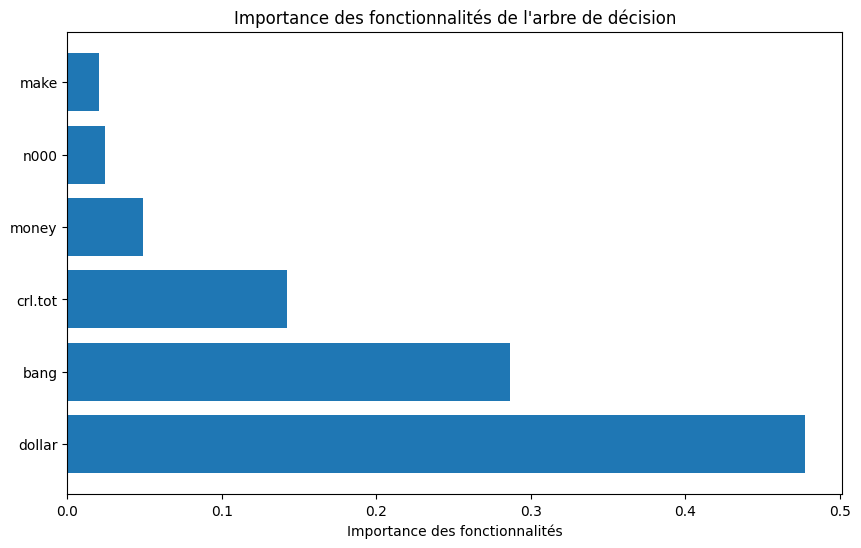

In [65]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Importance des fonctionnalités')
plt.title('Importance des fonctionnalités de l\'arbre de décision')
plt.show()


In [66]:
sorted_feature_importances

(0.4775192767565582,
 0.2864952159827739,
 0.14225379057872153,
 0.04913496024435233,
 0.0241326989254623,
 0.020464057512131734)

### Bagging

In [68]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [69]:
base_classifier = DecisionTreeClassifier()  
bagging_classifier = BaggingClassifier(base_classifier)
bagging_classifier.fit(X_train, y_train)
accuracy = bagging_classifier.score(X_test, y_test)
print("Précision du classifieur Bagging : {:.2f}%".format(accuracy * 100))


Précision du classifieur Bagging : 85.23%


In [74]:
oob_error = 1 - bagging_classifier.oob_score_
test_accuracy = bagging_classifier.score(X_test, y_test)
print(f"Erreur OOB : {oob_error:.4f}")
print(f"Précision sur les données de test : {test_accuracy:.4f}")

AttributeError: 'BaggingClassifier' object has no attribute 'oob_score_'